In [2]:
### Import required libraries ###
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torchvision 
batch_size_test = 100
batch_size_train = 1000
root = "/Users/robinlin/Desktop/Code"
datatrain = torchvision.datasets.MNIST(root, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
datatest = torchvision.datasets.MNIST(root, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
train_loader = torch.utils.data.DataLoader(datatrain,
                                          batch_size=batch_size_train,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(datatest, batch_size=batch_size_test, shuffle=True)

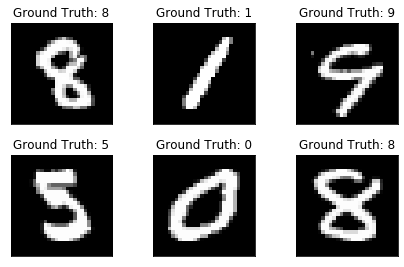

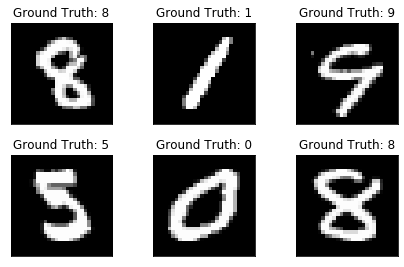

In [5]:
print(train_loader)
print(test_loader)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [21]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=(5,5), stride=1)
        self.batchnorm1 = nn.BatchNorm2d(num_features=20)
        self.batchnorm2 = nn.BatchNorm2d(num_features=50)
        self.conv2 = nn.Conv2d(20, 50, kernel_size=(5,5), stride=1)
        self.conv3 = nn.Conv2d(50, 50, kernel_size=(3,3), stride=1)
        self.fc1 = nn.Linear(16200, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.batchnorm1(self.conv1(x)))
        x = F.relu(self.batchnorm2(self.conv2(x)))
        x = F.relu(self.batchnorm2(self.conv3(x)))
        x = x.view(-1, 16200)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=(5,5), stride=1)
        self.conv2 = nn.Conv2d(20, 50, kernel_size=(5,5), stride=1)
        self.conv3 = nn.Conv2d(50, 50, kernel_size=(3,3), stride=1)
        self.fc1 = nn.Linear(16200, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu((self.conv1(x)))
        x = F.relu((self.conv2(x)))
        x = F.relu((self.conv3(x)))
        x = x.view(-1, 16200)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

cnn = Net1()
cnn2 = Net2()
print(cnn)
print(cnn2)

Net1(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=16200, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Net2(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=16200, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [25]:
def fit(model, train_loader,trainacc,losslist):
    optimizer = torch.optim.Adagrad(model.parameters(),lr=0.003)
    error = nn.CrossEntropyLoss()
    EPOCHS = 200
    model.train()
    for epoch in range(EPOCHS):
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()
            predicted = torch.max(output.data, 1)[1] 
            print("Accuracy:")
            print(((predicted == var_y_batch).sum()).double()/batch_size_train)
            trainacc.append(((predicted == var_y_batch).sum()).double()/batch_size_train)
            print("Loss:")
            print(loss)
            losslist.append(loss)
            print("Epoch:")
            print(epoch)
            print("Batch:")
            print(batch_idx)

    

In [ ]:
trainacc = []
loss = []
fit(cnn,train_loader,trainacc,loss)


Accuracy:
tensor(0.1320, dtype=torch.float64)
Loss:
tensor(2.3072, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
0
Accuracy:
tensor(0.3990, dtype=torch.float64)
Loss:
tensor(3.8114, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
1
Accuracy:
tensor(0.4360, dtype=torch.float64)
Loss:
tensor(7.8533, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
2
Accuracy:
tensor(0.2330, dtype=torch.float64)
Loss:
tensor(10.3079, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
3
Accuracy:
tensor(0.2920, dtype=torch.float64)
Loss:
tensor(6.1864, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
4
Accuracy:
tensor(0.4560, dtype=torch.float64)
Loss:
tensor(3.3844, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
5
Accuracy:
tensor(0.6330, dtype=torch.float64)
Loss:
tensor(1.5753, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
6
Accuracy:
tensor(0.6460, dtype=torch.float64)
Loss:
tensor(1.3064, grad_fn=<NllLossBackward>)
Epoch:
0
Batch:
7
Accuracy:
tensor(0.7750, dtype=torch.float64)
Loss:
tensor(0.7323, grad_fn=<NllLossBackward>)
Epoch:
0


Accuracy:
tensor(0.9680, dtype=torch.float64)
Loss:
tensor(0.1052, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
13
Accuracy:
tensor(0.9780, dtype=torch.float64)
Loss:
tensor(0.0948, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
14
Accuracy:
tensor(0.9740, dtype=torch.float64)
Loss:
tensor(0.0972, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
15
Accuracy:
tensor(0.9700, dtype=torch.float64)
Loss:
tensor(0.0956, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
16
Accuracy:
tensor(0.9720, dtype=torch.float64)
Loss:
tensor(0.1044, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
17
Accuracy:
tensor(0.9760, dtype=torch.float64)
Loss:
tensor(0.0868, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
18
Accuracy:
tensor(0.9810, dtype=torch.float64)
Loss:
tensor(0.0949, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
19
Accuracy:
tensor(0.9700, dtype=torch.float64)
Loss:
tensor(0.1053, grad_fn=<NllLossBackward>)
Epoch:
1
Batch:
20
Accuracy:
tensor(0.9770, dtype=torch.float64)
Loss:
tensor(0.0952, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(0.9870, dtype=torch.float64)
Loss:
tensor(0.0605, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
26
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0523, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
27
Accuracy:
tensor(0.9800, dtype=torch.float64)
Loss:
tensor(0.0662, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
28
Accuracy:
tensor(0.9810, dtype=torch.float64)
Loss:
tensor(0.0703, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
29
Accuracy:
tensor(0.9750, dtype=torch.float64)
Loss:
tensor(0.0766, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
30
Accuracy:
tensor(0.9780, dtype=torch.float64)
Loss:
tensor(0.0718, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
31
Accuracy:
tensor(0.9800, dtype=torch.float64)
Loss:
tensor(0.0730, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
32
Accuracy:
tensor(0.9730, dtype=torch.float64)
Loss:
tensor(0.0803, grad_fn=<NllLossBackward>)
Epoch:
2
Batch:
33
Accuracy:
tensor(0.9830, dtype=torch.float64)
Loss:
tensor(0.0734, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(0.9890, dtype=torch.float64)
Loss:
tensor(0.0498, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
39
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0378, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
40
Accuracy:
tensor(0.9860, dtype=torch.float64)
Loss:
tensor(0.0467, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
41
Accuracy:
tensor(0.9910, dtype=torch.float64)
Loss:
tensor(0.0385, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
42
Accuracy:
tensor(0.9840, dtype=torch.float64)
Loss:
tensor(0.0634, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
43
Accuracy:
tensor(0.9830, dtype=torch.float64)
Loss:
tensor(0.0602, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
44
Accuracy:
tensor(0.9800, dtype=torch.float64)
Loss:
tensor(0.0788, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
45
Accuracy:
tensor(0.9840, dtype=torch.float64)
Loss:
tensor(0.0535, grad_fn=<NllLossBackward>)
Epoch:
3
Batch:
46
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0352, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0291, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
52
Accuracy:
tensor(0.9890, dtype=torch.float64)
Loss:
tensor(0.0345, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
53
Accuracy:
tensor(0.9910, dtype=torch.float64)
Loss:
tensor(0.0332, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
54
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0296, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
55
Accuracy:
tensor(0.9810, dtype=torch.float64)
Loss:
tensor(0.0491, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
56
Accuracy:
tensor(0.9880, dtype=torch.float64)
Loss:
tensor(0.0454, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
57
Accuracy:
tensor(0.9840, dtype=torch.float64)
Loss:
tensor(0.0520, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
58
Accuracy:
tensor(0.9850, dtype=torch.float64)
Loss:
tensor(0.0442, grad_fn=<NllLossBackward>)
Epoch:
4
Batch:
59
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0363, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(0.9880, dtype=torch.float64)
Loss:
tensor(0.0355, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
5
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0408, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
6
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0269, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
7
Accuracy:
tensor(0.9880, dtype=torch.float64)
Loss:
tensor(0.0417, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
8
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0320, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
9
Accuracy:
tensor(0.9880, dtype=torch.float64)
Loss:
tensor(0.0389, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
10
Accuracy:
tensor(0.9860, dtype=torch.float64)
Loss:
tensor(0.0355, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
11
Accuracy:
tensor(0.9880, dtype=torch.float64)
Loss:
tensor(0.0404, grad_fn=<NllLossBackward>)
Epoch:
6
Batch:
12
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0344, grad_fn=<NllLossBackward>)
Epoch:


Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0225, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
18
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0198, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
19
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0192, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
20
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0349, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
21
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0283, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
22
Accuracy:
tensor(0.9840, dtype=torch.float64)
Loss:
tensor(0.0409, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
23
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0346, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
24
Accuracy:
tensor(0.9930, dtype=torch.float64)
Loss:
tensor(0.0281, grad_fn=<NllLossBackward>)
Epoch:
7
Batch:
25
Accuracy:
tensor(0.9880, dtype=torch.float64)
Loss:
tensor(0.0403, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0229, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
31
Accuracy:
tensor(0.9900, dtype=torch.float64)
Loss:
tensor(0.0339, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
32
Accuracy:
tensor(0.9870, dtype=torch.float64)
Loss:
tensor(0.0337, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
33
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0182, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
34
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0261, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
35
Accuracy:
tensor(0.9880, dtype=torch.float64)
Loss:
tensor(0.0318, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
36
Accuracy:
tensor(0.9910, dtype=torch.float64)
Loss:
tensor(0.0332, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
37
Accuracy:
tensor(0.9860, dtype=torch.float64)
Loss:
tensor(0.0397, grad_fn=<NllLossBackward>)
Epoch:
8
Batch:
38
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0222, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0297, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
44
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0123, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
45
Accuracy:
tensor(0.9890, dtype=torch.float64)
Loss:
tensor(0.0511, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
46
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0227, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
47
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0197, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
48
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0321, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
49
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0335, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
50
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0317, grad_fn=<NllLossBackward>)
Epoch:
9
Batch:
51
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0316, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0241, grad_fn=<NllLossBackward>)
Epoch:
10
Batch:
57
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0183, grad_fn=<NllLossBackward>)
Epoch:
10
Batch:
58
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0181, grad_fn=<NllLossBackward>)
Epoch:
10
Batch:
59
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0188, grad_fn=<NllLossBackward>)
Epoch:
11
Batch:
0
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0191, grad_fn=<NllLossBackward>)
Epoch:
11
Batch:
1
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0199, grad_fn=<NllLossBackward>)
Epoch:
11
Batch:
2
Accuracy:
tensor(0.9910, dtype=torch.float64)
Loss:
tensor(0.0256, grad_fn=<NllLossBackward>)
Epoch:
11
Batch:
3
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0182, grad_fn=<NllLossBackward>)
Epoch:
11
Batch:
4
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0266, grad_fn=<NllLossBackward>)

Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0151, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
10
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0216, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
11
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0199, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
12
Accuracy:
tensor(0.9910, dtype=torch.float64)
Loss:
tensor(0.0278, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
13
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0208, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
14
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0123, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
15
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0225, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
16
Accuracy:
tensor(0.9930, dtype=torch.float64)
Loss:
tensor(0.0240, grad_fn=<NllLossBackward>)
Epoch:
12
Batch:
17
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0194, grad_fn=<NllLossBackw

Accuracy:
tensor(0.9930, dtype=torch.float64)
Loss:
tensor(0.0249, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
22
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0150, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
23
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0261, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
24
Accuracy:
tensor(0.9930, dtype=torch.float64)
Loss:
tensor(0.0213, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
25
Accuracy:
tensor(0.9910, dtype=torch.float64)
Loss:
tensor(0.0255, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
26
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0200, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
27
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0225, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
28
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0180, grad_fn=<NllLossBackward>)
Epoch:
13
Batch:
29
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0106, grad_fn=<NllLossBackward>

Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0153, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
34
Accuracy:
tensor(0.9930, dtype=torch.float64)
Loss:
tensor(0.0228, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
35
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0168, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
36
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0186, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
37
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0166, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
38
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0200, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
39
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0160, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
40
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0114, grad_fn=<NllLossBackward>)
Epoch:
14
Batch:
41
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0207, grad_fn=<NllLossBackw

Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0160, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
46
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0129, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
47
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0182, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
48
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0203, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
49
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0121, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
50
Accuracy:
tensor(0.9920, dtype=torch.float64)
Loss:
tensor(0.0261, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
51
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0171, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
52
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0166, grad_fn=<NllLossBackward>)
Epoch:
15
Batch:
53
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0141, grad_fn=<NllLossBackw

Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0221, grad_fn=<NllLossBackward>)
Epoch:
16
Batch:
59
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0218, grad_fn=<NllLossBackward>)
Epoch:
17
Batch:
0
Accuracy:
tensor(0.9940, dtype=torch.float64)
Loss:
tensor(0.0249, grad_fn=<NllLossBackward>)
Epoch:
17
Batch:
1
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0166, grad_fn=<NllLossBackward>)
Epoch:
17
Batch:
2
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0208, grad_fn=<NllLossBackward>)
Epoch:
17
Batch:
3
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0152, grad_fn=<NllLossBackward>)
Epoch:
17
Batch:
4
Accuracy:
tensor(0.9930, dtype=torch.float64)
Loss:
tensor(0.0225, grad_fn=<NllLossBackward>)
Epoch:
17
Batch:
5
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0185, grad_fn=<NllLossBackward>)
Epoch:
17
Batch:
6
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0211, grad_fn=<NllLossBackward>)
E

Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0224, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
12
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0107, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
13
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0141, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
14
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0100, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
15
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0137, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
16
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0177, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
17
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0089, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
18
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0152, grad_fn=<NllLossBackward>)
Epoch:
18
Batch:
19
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0116, grad_fn=<NllLossBackward>

Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0134, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
25
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0145, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
26
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0175, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
27
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0083, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
28
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0143, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
29
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0125, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
30
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0106, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
31
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0110, grad_fn=<NllLossBackward>)
Epoch:
19
Batch:
32
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0145, grad_fn=<NllLossBackw

Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0101, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
38
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0072, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
39
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0097, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
40
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0094, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
41
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0118, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
42
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0091, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
43
Accuracy:
tensor(0.9960, dtype=torch.float64)
Loss:
tensor(0.0166, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
44
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0120, grad_fn=<NllLossBackward>)
Epoch:
20
Batch:
45
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0211, grad_fn=<NllLossBackward>

Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0125, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
51
Accuracy:
tensor(0.9930, dtype=torch.float64)
Loss:
tensor(0.0185, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
52
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0083, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
53
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0127, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
54
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0168, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
55
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0131, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
56
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0118, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
57
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0100, grad_fn=<NllLossBackward>)
Epoch:
21
Batch:
58
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0113, grad_fn=<NllLossBackw

Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0099, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
4
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0091, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
5
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0077, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
6
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0094, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
7
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0131, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
8
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0109, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
9
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0083, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
10
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0114, grad_fn=<NllLossBackward>)
Epoch:
23
Batch:
11
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0136, grad_fn=<NllLossBackward>)
Epoch:
2

Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0097, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
17
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0108, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
18
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0108, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
19
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0089, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
20
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0084, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
21
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0140, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
22
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0108, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
23
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0058, grad_fn=<NllLossBackward>)
Epoch:
24
Batch:
24
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0101, grad_fn=<NllLossBackward>

Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0083, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
30
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0103, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
31
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0074, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
32
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0079, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
33
Accuracy:
tensor(0.9950, dtype=torch.float64)
Loss:
tensor(0.0165, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
34
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0079, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
35
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0064, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
36
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0138, grad_fn=<NllLossBackward>)
Epoch:
25
Batch:
37
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0082, grad_fn=<NllLossBackward>)
Ep

Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0074, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
43
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0103, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
44
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0219, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
45
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0058, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
46
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0064, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
47
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0126, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
48
Accuracy:
tensor(0.9970, dtype=torch.float64)
Loss:
tensor(0.0118, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
49
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0130, grad_fn=<NllLossBackward>)
Epoch:
26
Batch:
50
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0059, grad_fn=<NllLossBackward>)
Epoch:

Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0055, grad_fn=<NllLossBackward>)
Epoch:
27
Batch:
56
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0101, grad_fn=<NllLossBackward>)
Epoch:
27
Batch:
57
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0074, grad_fn=<NllLossBackward>)
Epoch:
27
Batch:
58
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0106, grad_fn=<NllLossBackward>)
Epoch:
27
Batch:
59
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0072, grad_fn=<NllLossBackward>)
Epoch:
28
Batch:
0
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0076, grad_fn=<NllLossBackward>)
Epoch:
28
Batch:
1
Accuracy:
tensor(0.9980, dtype=torch.float64)
Loss:
tensor(0.0090, grad_fn=<NllLossBackward>)
Epoch:
28
Batch:
2
Accuracy:
tensor(1., dtype=torch.float64)
Loss:
tensor(0.0064, grad_fn=<NllLossBackward>)
Epoch:
28
Batch:
3
Accuracy:
tensor(0.9990, dtype=torch.float64)
Loss:
tensor(0.0101, grad_fn=<NllLossBackward>)
Epoch:
28


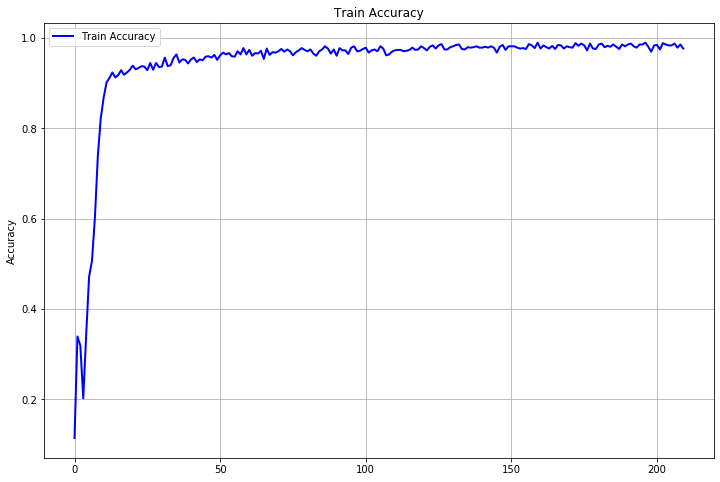

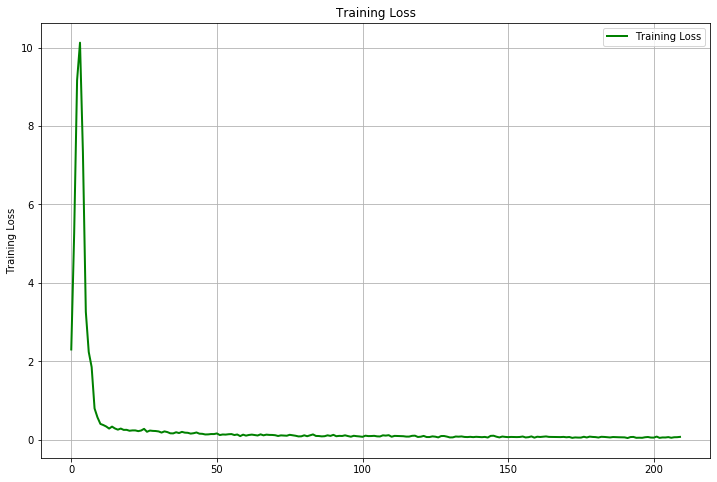

In [20]:
plt.figure(1, figsize=(12, 8))
plt.plot(trainacc, '-', color='blue',linewidth=2, label='Train Accuracy')
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(1, figsize=(12, 8))
plt.plot(loss, '-', color='green',linewidth=2, label='Training Loss')
plt.title('Training Loss')
plt.ylabel('Training Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
trainacc = []
loss = []
fit(cnn2,train_loader,trainacc,loss)

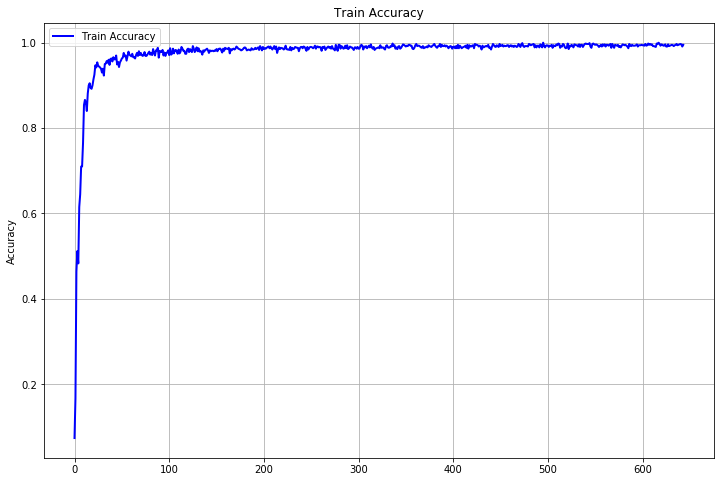

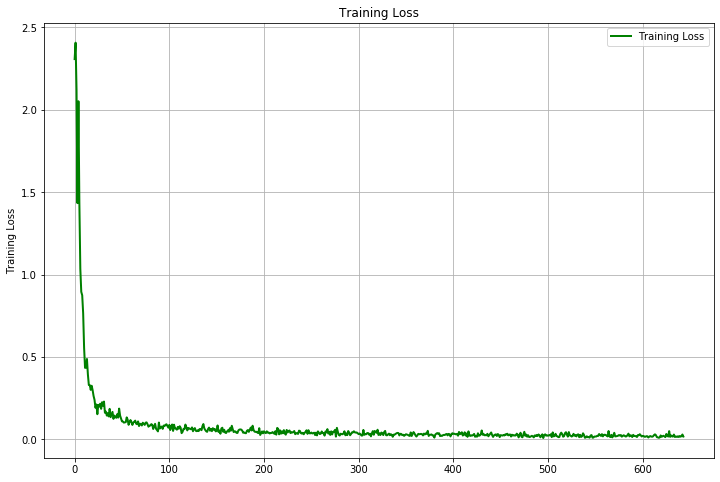

In [24]:
plt.figure(1, figsize=(12, 8))
plt.plot(trainacc, '-', color='blue',linewidth=2, label='Train Accuracy')
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(1, figsize=(12, 8))
plt.plot(loss, '-', color='green',linewidth=2, label='Training Loss')
plt.title('Training Loss')
plt.ylabel('Training Loss')
plt.legend(loc='best')
plt.grid()
plt.show()